In [2]:
from dataclasses import dataclass
import numpy as np
from pathlib import Path

In [3]:
@dataclass
class OccPlacementPair:
    occ: np.ndarray
    placements: np.ndarray
    valid: np.ndarray

    def save(self, path: str):
        data = {
            "occ": self.occ,
            "placements": self.placements,
            "valid": self.valid
        }
        np.savez_compressed(path, **data)
    
    @classmethod
    def load(cls, path: str):
        data = np.load(path)
        return cls(
            occ=data["occ"], 
            placements=data["placements"],
            valid=data["valid"]
        )

In [18]:
data_dir = Path("../../../dataset/tire_mask_v2")
data_list = list(data_dir.glob("*.npz"))

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [22]:
cmap = plt.get_cmap('tab20', 16)
colors = cmap(np.linspace(0, 1, 16))[:, :3]  # (15, 3), RGBA → RGB
colors[0] = np.array([0,0,0])
custom_cmap = ListedColormap(colors)

In [25]:
def draw_plot(idx):
    data = OccPlacementPair.load(data_list[idx])

    class_mask = np.argmax(data.placements, axis=-1)
    invalid_2d = data.placements.sum(axis=-1) == 0
    class_mask = class_mask + 1
    class_mask[invalid_2d] = 0
    placements = colors[class_mask]

    class_mask = np.argmax(data.valid, axis=-1)
    invalid_2d = (~data.valid).sum(axis=-1) == 0
    class_mask = class_mask + 1
    class_mask[invalid_2d] = 0
    valid = colors[class_mask]
    print(valid.shape, valid.max())

    fig, ax = plt.subplots(1, 3)
    mappable = ax[0].imshow(data.occ[0], cmap=custom_cmap, vmin=0, vmax=15)
    ax[1].imshow(valid)
    ax[2].imshow(placements)
    fig.tight_layout()

    cbar = fig.colorbar(
        mappable,
        ax=ax.tolist(),     # 전체 subplot을 리스트로 넘기기
        orientation='horizontal',
        fraction=0.05,       # colorbar 크기 조정
        pad=0.05             # 그림과 colorbar 사이 간격
    )

(160, 89, 3) 1.0


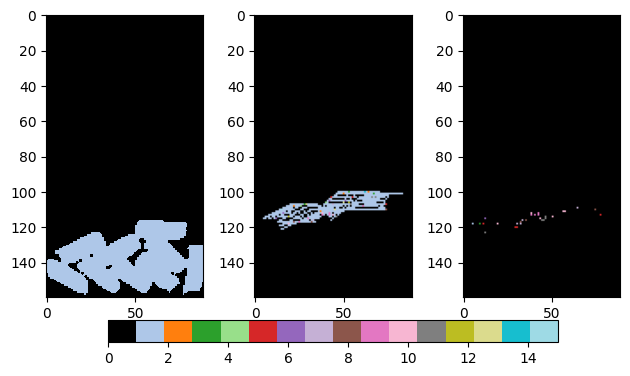

In [26]:
idx = 0

draw_plot(idx)